In [1]:
# imporing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pd.read_csv('Position_Salaries.csv', delimiter = ',')

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


No handles with labels found to put in legend.


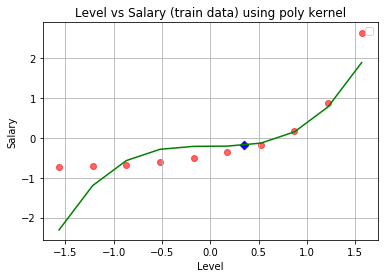

No handles with labels found to put in legend.


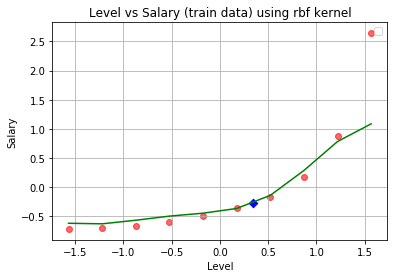

In [3]:
# importing dataset
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:,1].values
y = dataset.iloc[:,-1].values

# reshape x and y because they just have one feature
x = x.reshape(-1,1)
y = y.reshape(-1,1)

# feature scaling
from sklearn.preprocessing import StandardScaler
standardscaler_x = StandardScaler()
x = standardscaler_x.fit_transform(x)
standardscaler_y = StandardScaler()
y = standardscaler_y.fit_transform(y)

# reshape to 1d array, necessary for model.
y = y.reshape(len(y),)

# fittign SVR model to the data using POLY kernel
from sklearn.svm import SVR
regressor = SVR(kernel='poly')
regressor = regressor.fit(x,y)

# scaling test data for prediction
test = np.zeros(1) # we are testing just one value
test[0]= 6.5
test = test.reshape(1,1) # reshape to 2D array!
test = standardscaler_x.transform(test) # rescaling test data like train data

# making prediction
y_pred = regressor.predict(test)

# inver scalingy y to real value
y_predict = standardscaler_y.inverse_transform(y_pred)

#visualize the fitted model and our data
plt.scatter(x,y, color ='red', alpha=0.6)
plt.scatter(test,y_pred,color = 'blue', marker='D')
plt.plot(x,regressor.predict(x),color='green')
plt.title('Level vs Salary (train data) using poly kernel')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()


#################################
# fitting data with SVR model with RBF kernel
regressor2 = SVR(kernel='rbf')
regressor2 = regressor2.fit(x,y)

# making prediction
y_pred = regressor2.predict(test)

# inver scalingy y to real value
y_predict = standardscaler_y.inverse_transform(y_pred)

#visualize the fitted model and our data
plt.scatter(x,y, color ='red', alpha=0.6)
plt.scatter(test,y_pred,color = 'blue', marker='D')
plt.plot(x,regressor2.predict(x),color='green')
plt.title('Level vs Salary (train data) using rbf kernel')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()
